###### Chapter6. Financial Ratios(Industry level) Random Forest - data assisted by Wang ChengFan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
%matplotlib inline
from random import sample
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_ratios = pd.read_csv('Financial_ratios_Industry_new2.csv')
df_ratios

,public_date,gicdesc,NFIRM,futchangeNPM,indret_vw,dpr_Mean,PEG_trailing_Mean,bm_Mean,CAPEI_Mean,divyield_Mean,...,inv_turn_Mean,pay_turn_Mean,rect_turn_Mean,sale_equity_Mean,sale_invcap_Mean,sale_nwc_Mean,accrual_Mean,rd_sale_Mean,adv_sale_Mean,staff_sale_Mean
0,30/6/1999,Communication Services,117,1,0.054565,0.301,1.569,0.361,13.074,0.0212,...,55.873,6.210,6.144,2.834,1.382,12.041,-0.119,1.095,0.137,0.009
1,30/6/1999,Consumer Discretionary,1213,1,0.056150,0.161,0.645,0.855,72.114,0.0190,...,23.646,13.334,58.938,5.397,2.475,29.005,-0.052,0.128,0.023,0.022
2,30/6/1999,Consumer Staples,281,0,-0.010385,0.244,1.747,0.695,22.661,0.0207,...,8.258,12.039,24.457,6.183,2.862,31.724,-0.038,0.007,0.033,0.004
3,30/6/1999,Energy,235,1,0.001533,0.407,0.702,0.944,18.062,0.0293,...,95.906,7.264,6.685,2.083,1.285,53.031,-0.160,0.002,0.000,0.020
4,30/6/1999,Financials,1111,0,0.032834,0.195,2.133,0.780,28.371,0.0238,...,75.656,6.940,3.380,1.233,0.787,18.764,0.006,0.006,0.007,0.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,30/11/2021,Industrials,500,0,-0.032490,1.257,2.220,0.480,-67.313,0.0153,...,21.990,16.388,7.758,4.696,1.561,12.428,-0.036,556.796,0.021,0.064
2759,30/11/2021,Information Technology,540,1,0.024663,0.292,0.834,0.302,-75.657,0.0173,...,20.984,13.253,8.526,3.606,1.231,2.691,-0.061,0.599,0.014,0.030
2760,30/11/2021,Materials,151,0,-0.008783,0.533,1.360,0.636,30.797,0.0195,...,5.652,8.930,10.017,3.850,1.196,5.788,-0.045,0.069,0.001,0.005
2761,30/11/2021,Real Estate,41,0,-0.176764,0.390,-0.416,0.685,-602.730,0.0241,...,56.790,52.948,40.598,2.155,1.620,11.111,-0.012,0.037,0.006,0.039


In [3]:
df_ratios_1=df_ratios.iloc[:,4:74]
df_ratios_1.describe()

,indret_vw,dpr_Mean,PEG_trailing_Mean,bm_Mean,CAPEI_Mean,divyield_Mean,evm_Mean,pcf_Mean,pe_exi_Mean,pe_inc_Mean,...,inv_turn_Mean,pay_turn_Mean,rect_turn_Mean,sale_equity_Mean,sale_invcap_Mean,sale_nwc_Mean,accrual_Mean,rd_sale_Mean,adv_sale_Mean,staff_sale_Mean
count,2763.000000,2763.000000,2763.000000,2763.000000,2.763000e+03,2763.000000,2.763000e+03,2763.000000,2763.000000,2763.000000,...,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2.763000e+03,2763.000000,2763.000000,2763.000000,2763.000000
mean,0.007786,0.854545,1.590547,0.866917,8.830981e+11,0.026746,3.391241e+12,7.470954,-0.401867,-0.118124,...,53.265378,22.383057,24.845756,4.952852,1.629526,1.581614e+10,-0.069670,2.988202,0.019371,0.084386
std,0.056692,3.652362,1.478804,2.932913,1.058267e+14,0.011828,1.836514e+14,4.706189,26.442317,25.047585,...,204.182180,141.788781,108.326522,21.773214,6.257582,4.798242e+11,0.063216,22.014819,0.042039,0.387968
min,-0.370985,-1.675000,-6.789000,0.261000,-1.870000e+15,0.010100,-2.070000e+15,-23.477000,-229.700000,-203.150000,...,3.345000,4.393000,1.508000,0.814000,-130.570000,-3.706700e+03,-0.268000,0.000000,0.000000,0.000000
25%,-0.021407,0.278000,0.704500,0.563000,3.903500e+00,0.019400,3.165500e+00,4.692000,-5.185500,-5.305000,...,18.790500,10.040000,7.860500,2.051500,1.001000,7.597500e+00,-0.098000,0.007000,0.002000,0.004000
50%,0.011062,0.448000,1.446000,0.714000,1.587400e+01,0.023600,8.342000e+00,7.663000,6.673000,6.751000,...,30.664000,12.277000,9.364000,2.912000,1.520000,1.353700e+01,-0.065000,0.032000,0.011000,0.025000
75%,0.039770,0.731500,2.351500,0.905500,2.740350e+01,0.030400,1.268500e+01,10.328000,14.217000,13.797500,...,47.611500,15.371000,17.088500,4.883000,2.244500,2.374800e+01,-0.042000,0.242000,0.026000,0.053000
max,0.325330,92.984000,9.035000,150.898000,2.720000e+15,0.124000,5.190000e+15,26.226000,46.231000,44.269000,...,5481.040000,4003.550000,2457.570000,625.243000,135.916000,1.470000e+13,0.985000,556.796000,0.528000,8.469000


In [4]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_ratios_1)
df_ratios_1 = scaler.transform(df_ratios_1)
df_ratios_1 = pd.DataFrame(df_ratios_1,columns=['indret_vw','dpr_Mean','PEG_trailing_Mean','bm_Mean','CAPEI_Mean','divyield_Mean','evm_Mean','pcf_Mean','pe_exi_Mean','pe_inc_Mean','pe_op_basic_Mean','pe_op_dil_Mean','ps_Mean','ptb_Mean','efftax_Mean','GProf_Mean','aftret_eq_Mean','aftret_equity_Mean','aftret_invcapx_Mean','gpm_Mean','npm_Mean','opmad_Mean','opmbd_Mean','pretret_earnat_Mean','pretret_noa_Mean',
                                                    'ptpm_Mean','roa_Mean','roce_Mean','roe_Mean','capital_ratio_Mean','equity_invcap_Mean','debt_invcap_Mean','totdebt_invcap_Mean','invt_act_Mean','rect_act_Mean','fcf_ocf_Mean','ocf_lct_Mean','cash_debt_Mean','cash_lt_Mean','cfm_Mean','short_debt_Mean','profit_lct_Mean','curr_debt_Mean','debt_ebitda_Mean','dltt_be_Mean',
                                                    'int_debt_Mean','int_totdebt_Mean','lt_debt_Mean','lt_ppent_Mean','de_ratio_Mean',
                                                    'debt_assets_Mean','debt_at_Mean','debt_capital_Mean','intcov_Mean','intcov_ratio_Mean',
                                                    'cash_conversion_Mean','cash_ratio_Mean','curr_ratio_Mean','quick_ratio_Mean','at_turn_Mean',
                                                    'inv_turn_Mean','pay_turn_Mean','rect_turn_Mean','sale_equity_Mean','sale_invcap_Mean','sale_nwc_Mean','accrual_Mean','rd_sale_Mean','adv_sale_Mean','staff_sale_Mean'])

In [5]:
df_ratios_1.shape

(2763, 70)

In [6]:
df_ratios_new = df_ratios_1.copy()

### Split the dataset: Creating a Training Set and a Test Set

- 25% of the data will be used as the test set and 75% of the data would be used to train

In [7]:
TT=pd.concat([df_ratios['futchangeNPM'],df_ratios_new],axis=1)
TT.shape
TT.tail()

,futchangeNPM,indret_vw,dpr_Mean,PEG_trailing_Mean,bm_Mean,CAPEI_Mean,divyield_Mean,evm_Mean,pcf_Mean,pe_exi_Mean,...,inv_turn_Mean,pay_turn_Mean,rect_turn_Mean,sale_equity_Mean,sale_invcap_Mean,sale_nwc_Mean,accrual_Mean,rd_sale_Mean,adv_sale_Mean,staff_sale_Mean
2758,0,-0.710566,0.110210,0.425728,-0.131946,-0.008346,-0.967841,-0.018469,0.375753,0.665602,...,-0.153202,-0.042289,-0.157772,-0.011799,-0.010953,-0.032968,0.532714,25.160690,0.038749,-0.052555
2759,1,0.297750,-0.154050,-0.511686,-0.192648,-0.008346,-0.798725,-0.018469,1.261768,-0.297461,...,-0.158129,-0.064404,-0.150681,-0.061869,-0.063698,-0.032968,0.137173,-0.108547,-0.127794,-0.140206
2760,0,-0.292317,-0.088053,-0.155929,-0.078747,-0.008346,-0.612699,-0.018469,0.058029,0.168354,...,-0.233233,-0.094898,-0.136914,-0.050661,-0.069293,-0.032968,0.390319,-0.132626,-0.437089,-0.204656
2761,0,-3.255907,-0.127213,-1.357117,-0.062037,-0.008346,-0.223733,-0.018469,-2.681626,1.033450,...,0.017265,0.215606,0.145441,-0.128523,-0.001523,-0.032968,0.912434,-0.134080,-0.318130,-0.117004
2762,0,-0.426664,0.113770,1.765566,-0.081134,-0.008346,0.503462,-0.018469,0.564050,0.912864,...,-0.171522,-0.105994,-0.143590,-0.181396,-0.189169,-0.032968,0.801683,-0.135761,-0.460881,-0.212390


In [8]:
Train, Test = train_test_split(TT, test_size=0.25, random_state=42)
X_train, y_train = Train.iloc[:,1:71], Train.iloc[:,0] ### choose the 70 features excluding futchangeNPM
X_test, y_test = Test.iloc[:,1:71], Test.iloc[:,0]

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2072, 70), (2072,), (691, 70), (691,))

# Random Forest

In [10]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=500, random_state=1, max_features="sqrt", max_depth=34)
### default n_estimators/trees = 100; default criterion = 'gini' 
### max_features default case is "sqrt"; unlike DecisionTree Classifier where default case = "none"
### If max_depth=None, then nodes are expanded until all leaves are pure or until all leaves contain less than 
###   min_samples_split samples -- usu 2
### bootsrapping - bagging, default=true
### oob_scorebool, default=False -- Whether to use out-of-bag samples to estimate the generalization score. 
###    Only available if bootstrap=True.
RF_model.fit(X_train,y_train)

y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.5412445730824892


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RF)
print(confusion_matrix)

[[259 133]
 [184 115]]


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.58      0.66      0.62       392
           1       0.46      0.38      0.42       299

    accuracy                           0.54       691
   macro avg       0.52      0.52      0.52       691
weighted avg       0.53      0.54      0.53       691



In [13]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_RF = RF_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_RF)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_RF = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_RF

0.5209797966009145

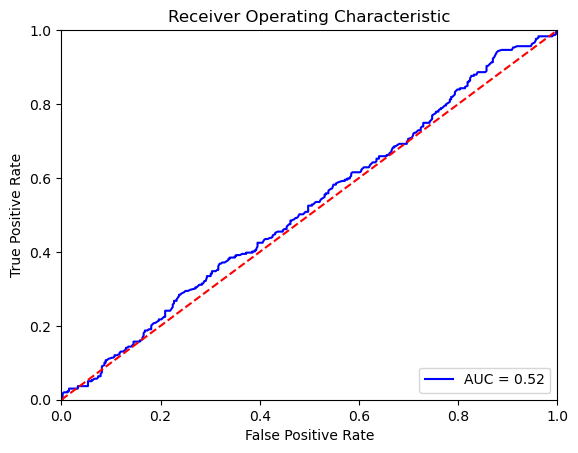

In [14]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting


In [15]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
### criterion='gini'
### min_samples_splitint or float, default=2
### min_samples_leafint or float, default=1 (The minimum number of samples required to be at a leaf node)
### sample_wt is same as min_sample on leaf except this is wt x total sample. Default -- equal weight 
### max_depth, default=3, maximum depth of the individual regression estimators --limits the number of nodes in the tree. 
###   Tune this parameter for best performance;
### min_impurity_decreasefloat, default=0.0, a node will be split if this split induces a decrease of the impurity > value
### random_stateint, RandomState instance or None, default=None, controls the random seed given to each Tree estimator 
###   at each boosting iteration. In addition, it controls the random permutation of the features at each split 
###   It also controls the random splitting of the training data to obtain a validation set if n_iter_no_change is not None. 

GB_model = GradientBoostingClassifier(n_estimators=500, random_state=1, max_features="sqrt", learning_rate=0.055,max_depth=24)
GB_model.fit(X_train, y_train)

y_pred_GB = GB_model.predict(X_test)
Accuracy_GB = metrics.accuracy_score(y_test, y_pred_GB)
print("GB Accuracy:",Accuracy_GB)

GB Accuracy: 0.516642547033285


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_GB)
print(confusion_matrix)

[[239 153]
 [181 118]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_GB))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59       392
           1       0.44      0.39      0.41       299

    accuracy                           0.52       691
   macro avg       0.50      0.50      0.50       691
weighted avg       0.51      0.52      0.51       691



In [18]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_GB = GB_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_GB)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_GB = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_GB

0.512900143334926

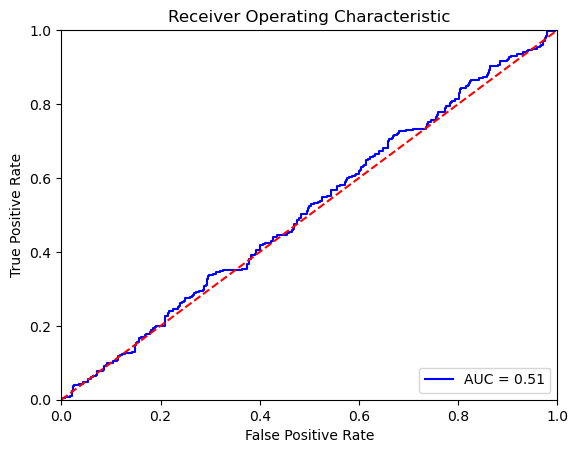

In [19]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_GB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
# Light GBM
#pip install --upgrade pip
!pip3 install lightgbm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import lightgbm as lgb
from lightgbm.sklearn import LGBMClassifier

In [23]:
# Creating an object for model and fitting it on training data set
model = LGBMClassifier(learning_rate=0.1)
model.fit(X_train, y_train)
 
# Predicting the Target variable
predLGBM = model.predict(X_test)
print(predLGBM)
accuracy = model.score(X_test, y_test)
print(accuracy)

[LightGBM] [Info] Number of positive: 840, number of negative: 1232
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17430
[LightGBM] [Info] Number of data points in the train set: 2072, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.405405 -> initscore=-0.382992
[LightGBM] [Info] Start training from score -0.382992
[0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1
 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predLGBM)
print(confusion_matrix)

[[270 122]
 [184 115]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predLGBM))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64       392
           1       0.49      0.38      0.43       299

    accuracy                           0.56       691
   macro avg       0.54      0.54      0.53       691
weighted avg       0.55      0.56      0.55       691



In [26]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_LGBM = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_LGBM)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_LGBM = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_LGBM

0.5216964712306327

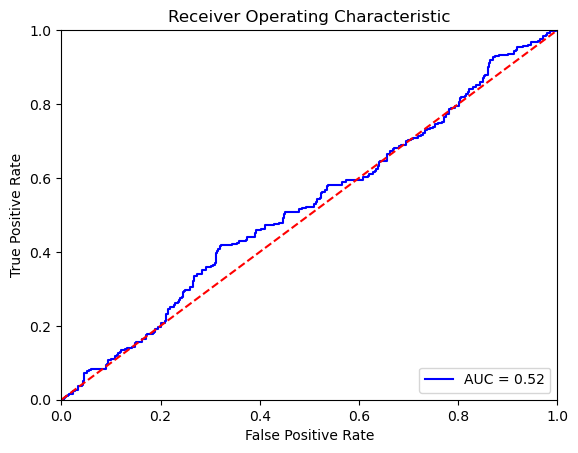

In [27]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_LGBM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=1, 
                        multi_class='multinomial',
                        solver='newton-cg')
LR = LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)
### recall in last chapter3 -- using statsmodel has issues in convergence with features have very high multicollinearity
###   in that case, we reduce to 38 features and obtain via statsmodel and also sklearn accuracy of about 55.7% but similar AUC
###   of just above 50%. sklearn LogisticReg with multi-class ='multinomial' and solver='newton-cg' seems more effective in 
###   handling flat surfaces and does not produce non-convergence red flag here when all 70 features are used

LR Accuracy: 0.5513748191027497


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix)

[[343  49]
 [261  38]]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.57      0.88      0.69       392
           1       0.44      0.13      0.20       299

    accuracy                           0.55       691
   macro avg       0.50      0.50      0.44       691
weighted avg       0.51      0.55      0.48       691



In [31]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_LR = LR.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_LR)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_LR = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_LR

0.5146577025459013

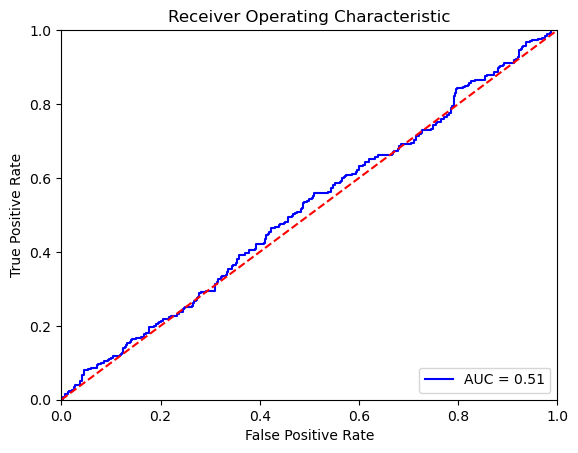

In [32]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_LR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Make comparison

In [33]:
AUC_list = [roc_auc_RF, roc_auc_GB, roc_auc_LGBM, roc_auc_LR]
model_list = ['Random Forest', 'Gradient Boosting', 'Light GBM', 'Logistic Regression']
df_AUC= pd.DataFrame({'Model': model_list, 'AUC': AUC_list})
df_AUC

,Model,AUC
0,Random Forest,0.520980
1,Gradient Boosting,0.512900
2,Light GBM,0.521696
3,Logistic Regression,0.514658


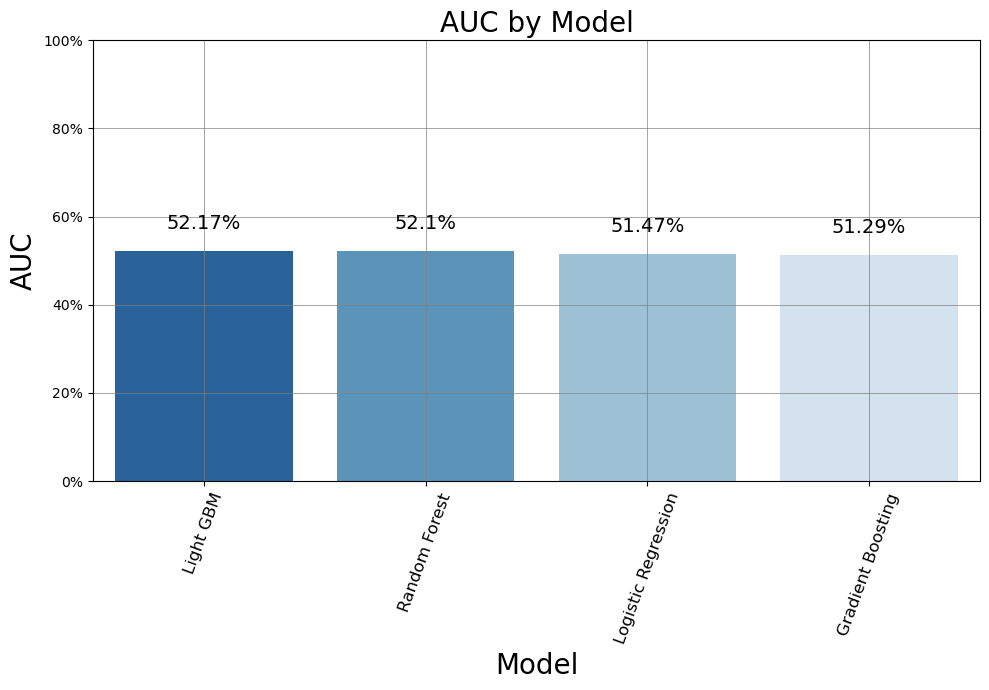

In [34]:
order = list(df_AUC.sort_values('AUC', ascending=False).Model)
df_AUC = df_AUC.sort_values('AUC', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(10,7))
# make barplot and sort bars
x = sns.barplot(x='Model', y="AUC", 
                data=df_AUC, 
                order = order, 
                palette="Blues_r")

plt.xlabel("Model", fontsize=20)
plt.ylabel("AUC", fontsize=20)
plt.title("AUC by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_AUC.loc[i, 'AUC'] + 0.05, 
             s = str(round((df_AUC.loc[i, 'AUC'])*100, 2))+'%', 
             fontsize = 14, 
             color='black',
             horizontalalignment='center')

plt.tight_layout()
